# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
df = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [5]:
# Sua análise da parte 1 começa aqui.
df.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


#### seaborn.distplot
Plotagem flexível de uma distribuição univariada de observações.

Essa função combina a função matplotlib hist (com cálculo automático de um bom tamanho de compartimento padrão) com as funções seade kdeplot () e rugplot (). Ele também pode ajustar as distribuições scipy.stats e plotar o PDF estimado sobre os dados.

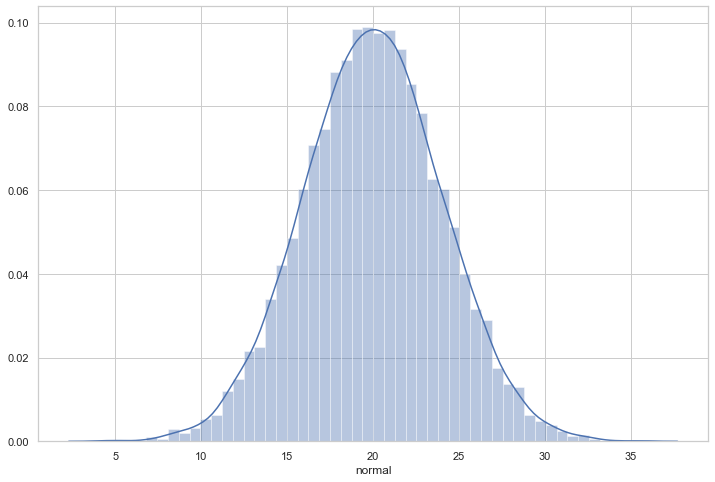

In [43]:
sns.distplot(df["normal"])

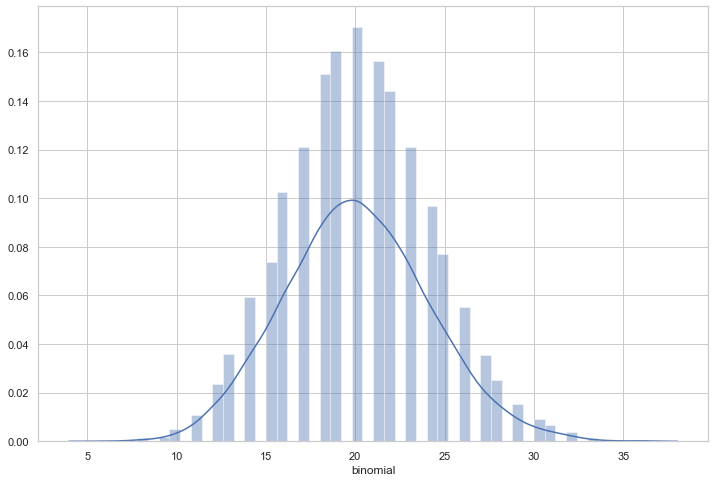

In [44]:
sns.distplot(df["binomial"])

#### box plot
mostra a distribuição de dados quantitativos de uma maneira que facilita as comparações entre variáveis ou entre os níveis de uma variável categórica. A caixa mostra os quartis do conjunto de dados enquanto os bigodes se estendem para mostrar o restante da distribuição, exceto os pontos que são determinados como "outliers" usando um método que é uma função da faixa inter-quartil.

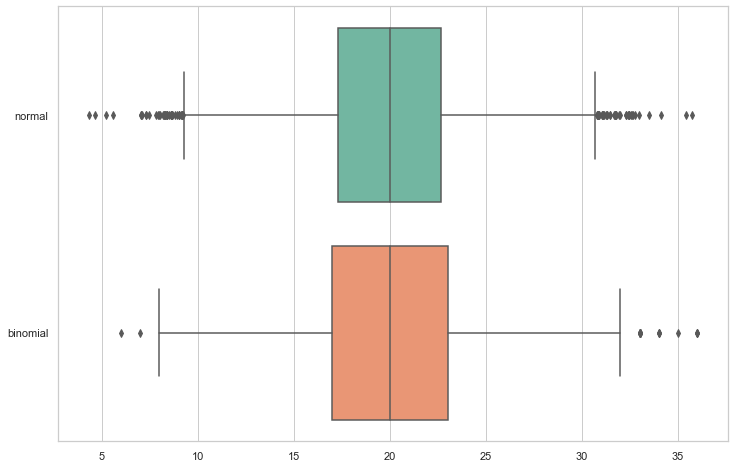

In [36]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [34]:
def q1():
    # Retorne aqui o resultado da questão 1.
    aux = df.quantile([.25, .5, .75])
    
    tupla = (
        round(aux['normal'][0.25] - aux['binomial'][0.25], 3),
        round(aux['normal'][0.50] - aux['binomial'][0.50], 3),
        round(aux['normal'][0.75] - aux['binomial'][0.75], 3)
    )
    
    return tupla

q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [75]:
def q2():
    # Retorne aqui o resultado da questão 2.
    
    ecdf = ECDF(df['normal'])
    
    mean = df.normal.mean()
    std = df.normal.std()
    
    return round( ecdf(mean+std) - ecdf(mean-std), 3 )

q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [45]:
ecdf = ECDF(df['normal'])
    
mean = df.normal.mean()
std = df.normal.std()

In [46]:
round( ecdf(mean + std * 2) - ecdf(mean - std * 2), 3 )

0.954

In [47]:
round( ecdf(mean + std * 3) - ecdf(mean - std * 3), 3 )

0.997

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [48]:
def q3():
    # Retorne aqui o resultado da questão 3.
    df_mean = df.mean()
    df_var = df.var()
    
    tupla = (
        round(df_mean['binomial'] - df_mean['normal'], 3),
        round(df_var['binomial'] - df_var['normal'], 3)
    )
    
    return tupla

q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [18]:
stars = pd.read_csv("HTRU_2.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [78]:
# Sua análise da parte 2 começa aqui.
stars

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,False
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,False
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,False
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,False


In [77]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

In [97]:
aux = stars.query('target == False')['mean_profile']
aux_mean = aux.mean()
aux_std = aux.std()

false_pulsar_mean_profile_standardized = (aux - aux_mean) / aux_std

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [111]:
def q4():
    # Retorne aqui o resultado da questão 4.
    
    quantis_teoricos = (
        sct.norm.ppf(
            0.80,
            loc=false_pulsar_mean_profile_standardized.mean(),
            scale=false_pulsar_mean_profile_standardized.std()
        ),
        sct.norm.ppf(
            0.90, 
            loc=false_pulsar_mean_profile_standardized.mean(), 
            scale=false_pulsar_mean_profile_standardized.std()
        ),
        sct.norm.ppf(
            0.95, 
            loc=false_pulsar_mean_profile_standardized.mean(), 
            scale=false_pulsar_mean_profile_standardized.std()
        )
    )    
    
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
        
    resposta = (
        round(ecdf(quantis_teoricos[0]), 3),
        round(ecdf(quantis_teoricos[1]), 3),
        round(ecdf(quantis_teoricos[2]), 3)
    )
    
    return resposta
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [113]:
def q5():
    # Retorne aqui o resultado da questão 5.
    quantis = sct.norm.ppf((0.25, 0.5, 0.75))
    quantis_teoricos = false_pulsar_mean_profile_standardized.quantile((0.25, 0.5, 0.75))
    
    resp = (
        round(quantis_teoricos[0.25] - quantis[0], 3),
        round(quantis_teoricos[0.50] - quantis[1], 3),
        round(quantis_teoricos[0.75] - quantis[2], 3)
    )
    
    return resp

q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.